# Recording speech using CircuitPython
This notebook contains code to record speech on a computer using a microphone connected to Raspberry Pi Pico. This is an essential first step, to check if the circuit is setup correctly and it is able to record speech. Also listening the the speech sample will help use know the qulaity of sound that is being captured and level of noise. Before we start building a [speech recognition system](https://ashishware.com/2024/05/20/pipicospeech/), let us first record and listen to the sound. 

### Assembling the circuit. 

Use the below diagrams as guide to assemble the curcuit.
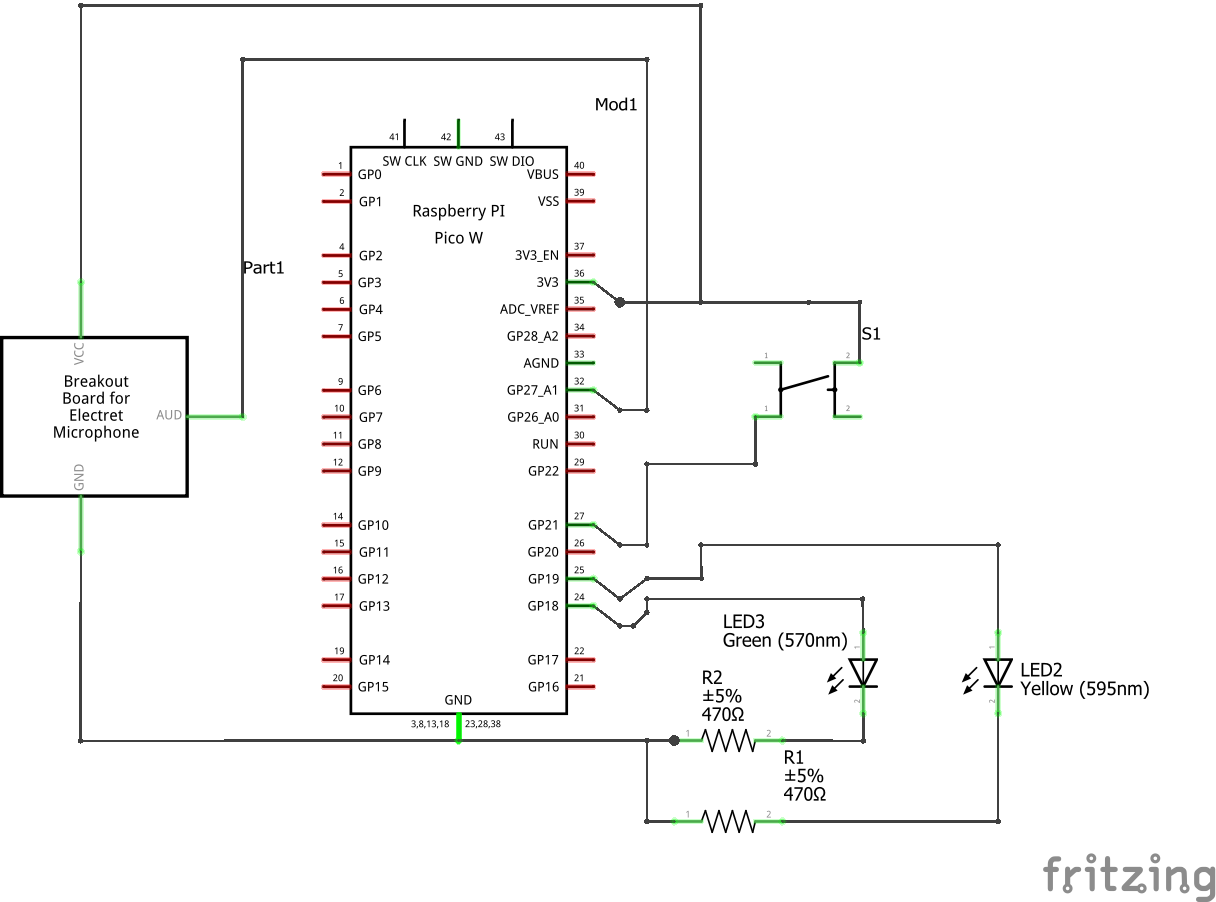
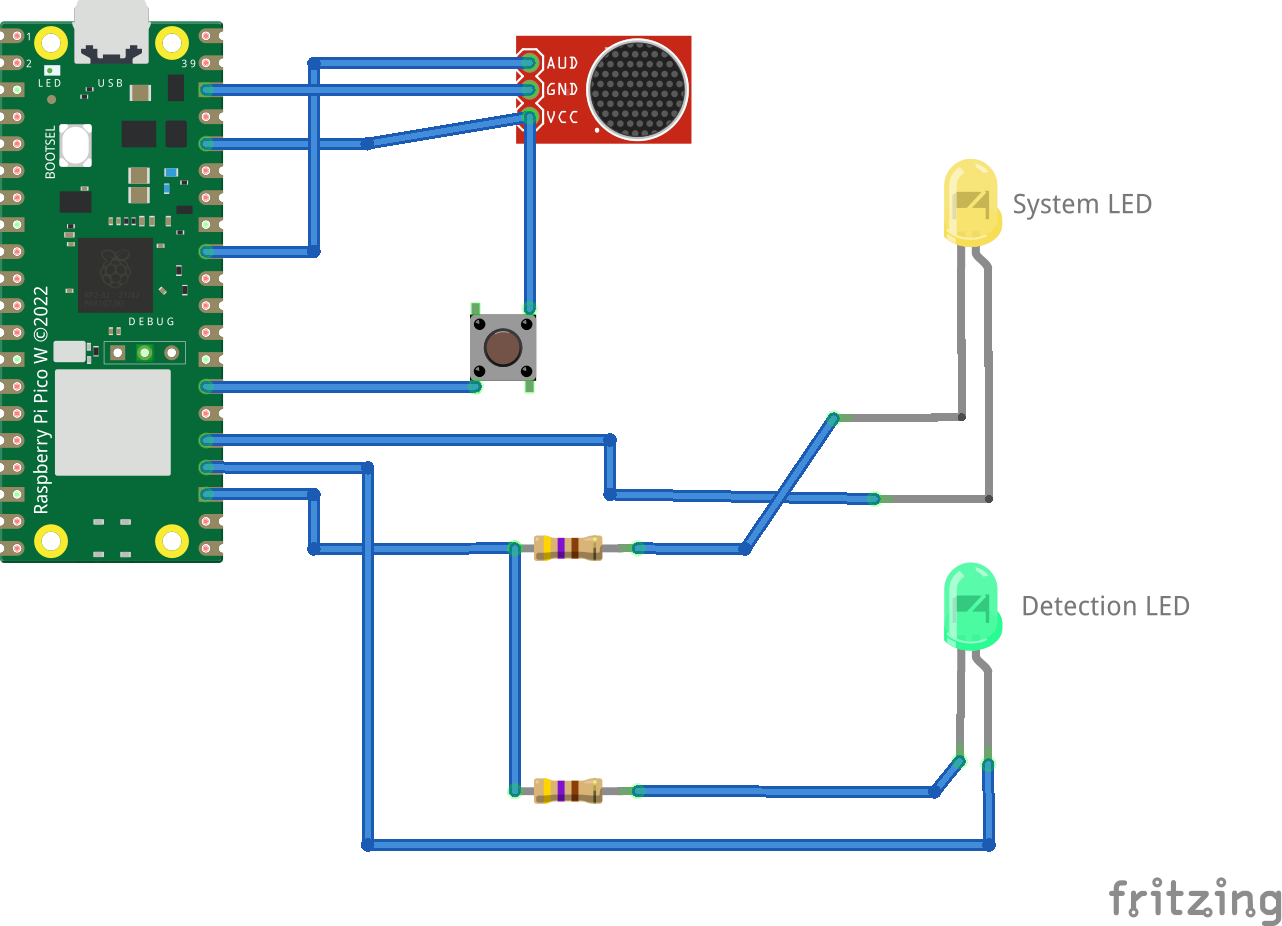

Once the circuit is assembled, upload this code to your CircuitPython board and run the below cell. The cell will not output anything at first (make sure you get the `com_port` correct). Press the push button connected to the circuit. The yellow LED should glow for approximately a second. Speak into the microphone while the yellow LED is on. The cell should finish execution and play the recorded audio clip for you along with some other information

Number of samples : 8000
Time taken: 0.981995 seconds
Sampling rate : 8.14668 kilohertz
Max frequency captured : 4.07334 kilohertz


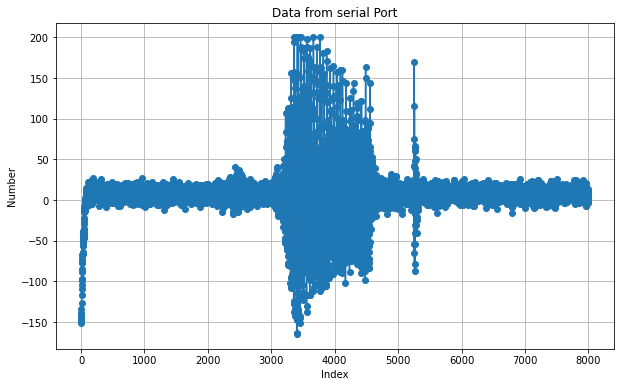

In [12]:
import serial
import numpy as np
import pyaudio
import wave
from IPython.display import Audio
import statistics
import matplotlib.pyplot as plt


# Serial port configuration
ser = serial.Serial('COM9', 9600)  

# Audio configuration
FORMAT = pyaudio.paFloat32
CHANNELS = 1
RATE = 8000
CHUNK = 512

# Create PyAudio object
audio = pyaudio.PyAudio()

# Open audio stream
stream = audio.open(format=FORMAT, channels=CHANNELS,
                    rate=RATE, output=True,
                    frames_per_buffer=CHUNK)

# Read serial data until "END" is encountered
data = ''
while True:
    line = ser.readline().decode().strip()
    if line == 'END':
        break
    if line.replace('.', '', 1).replace('-',"").isdigit(): 
        data += line + '\n'
    else:
        print(line)
ser.close()
# Convert data to numpy array and scale it
 
numbers = np.array([float(x) for x in data.split()])
scaled_data = ((numbers) / np.max(numbers)).astype(np.float32)
scaled_data = 200*scaled_data
file_name = "audio.wav"
# Save audio to a WAV file
with wave.open(file_name, 'wb') as wf:
    wf.setnchannels(CHANNELS)
    wf.setsampwidth(audio.get_sample_size(FORMAT))
    wf.setframerate(RATE)
    wf.writeframes(scaled_data.tobytes())
    

plt.figure(figsize=(10, 6))
plt.plot(scaled_data, marker='o')
plt.xlabel('Index')
plt.ylabel('Number')
plt.title('Data from serial Port')
plt.grid(True)
plt.show()

# Play audio in the notebook
Audio(filename=file_name, autoplay=True)